# K-Nearest Neighbors And Decision Trees
In this assignment, we will explore two fundamental supervised machine learning algorithms: K-Nearest Neighbors (KNN) and Decision Trees. Both algorithms are widely used for classification and regression tasks due to their simplicity and interpretability.


To provide a practical understanding of these algorithms, we will utilize the breast cancer dataset, a well-known dataset in the machine learning community. This dataset consists of features computed from digitized images of fine needle aspirates (FNA) of breast masses, and the target variable indicates whether the mass is malignant or benign.

We have previously worked with this dataset in Assignment 4, where we conducted an exploratory data analysis (EDA). Therefore, in this assignment, we will directly load the dataset and proceed with applying and analyzing the KNN and Decision Tree algorithms without repeating the EDA process.


In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split


# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## 1. K-Nearest Neighbors
### 1.2 ✏️Impact of the number of neighbors (k)

In this section, we explore the impact of the number of neighbors (k) on the performance of the K-Nearest Neighbors (KNN) algorithm. We aim to understand how varying k affects the training and validation errors, and to identify the optimal k value that balances these errors for improved model performance.

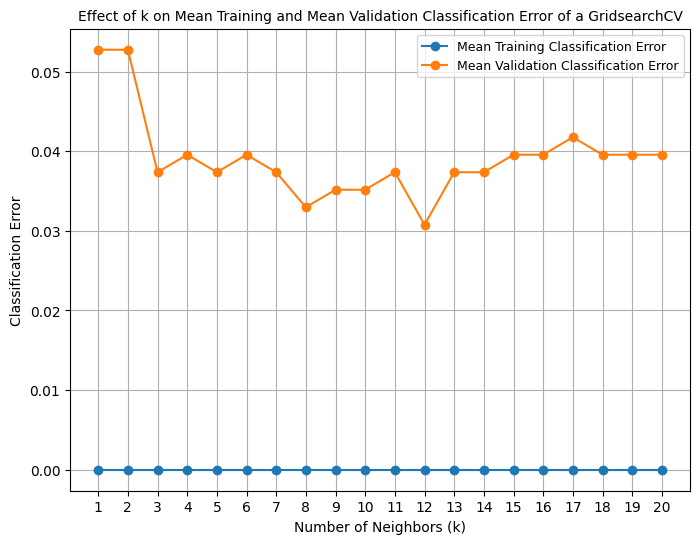

In [65]:
#Cell_1

# Initialize a pipeline for KNN classifier
pipe_knn_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(p = 2, weights='distance'))
])
 
# Perform grid search with Stratified K-Fold cross-validation
# Define the range of k values
n_k=20
param_grid = {'knn__n_neighbors': range(1, n_k+1)}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_1 = GridSearchCV(pipe_knn_1, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search_1.fit(X_train, y_train)

# Get the mean test scores and training scores
mean_test_scores = grid_search_1.cv_results_['mean_test_score']
mean_train_scores = grid_search_1.cv_results_['mean_train_score']

# Plot the mean test and training accuracy for each value of k
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_k+1), 1-mean_train_scores, marker='o', label='Mean Training Classification Error')
plt.plot(range(1, n_k+1), 1-mean_test_scores, marker='o', label='Mean Validation Classification Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Error')
plt.title('Effect of k on Mean Training and Mean Validation Classification Error of a GridsearchCV', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True)
plt.xticks(range(1, n_k+1))
plt.show()

**Small k Values:**
- **k = 1:** For k=1, each point is essentially its own nearest neighbor, leading to perfect classification on the training set (training error is zero). However, this results in a high validation error due to overfitting, as the model captures noise and minor fluctuations in the training data.

**Large k Values:**
- **Increased k:** As k increases, the algorithm averages over a larger number of neighbors, making it less sensitive to individual data points. This leads to higher training error because the model is less flexible. However, this smoothing effect reduces variance but increases bias.
- **Optimal Point:** The validation error initially decreases as k increases from very small values, reaching an optimal point where the validation error is minimized. Beyond this point, as k becomes too large, the validation error starts to increase again due to underfitting, as the model becomes too simplistic and fails to capture the underlying data structure.

**Optimal k Value:**
- **Elbow Point:** Looking for an "elbow" point where the rate of improvement in the validation error slows down is often a good choice for selecting k.
- **Selected k = 10:** For the represented problem, k = 10 is identified as the best hyperparameter, as it balances the training and validation errors effectively, minimizing the classification error on the validation set.


1. ✏️Confirm this by displaying the best estimator parameters from the grid search results

In [66]:
#Cell_2
display("Best parameters:", grid_search_1.best_params_)
display(pipe_knn_1)
# TODO: Implement


'Best parameters:'

{'knn__n_neighbors': 12}

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

2.✏️ Evaluate the best estimator on traning and test data using a confusion matrix and a classification report.

In [67]:
#Cell_3
y_pred_train_1 = grid_search_1.predict(X_train)

print("\ntrain data Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_1))
# Classification report
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train_1))

y_pred_test_1 = grid_search_1.predict(X_test)

print("\ntest data Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_1))
# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_1))


train data Confusion Matrix:
[[170   0]
 [  0 285]]
Classification Report for Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


test data Confusion Matrix:
[[39  3]
 [ 0 72]]
Classification Report for Testing:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



3. ✏️ Discuss the results.

In [51]:
#Discuss the results here
# with 'uniform' as 'weights' parameter does not have good results as all neighbors contribute equally to the prediction.

### 1.3 ✏️Distance Weighting in KNN
Distance weighting can improve the results because it gives more influence to closer neighbors in the prediction process. This approach helps the algorithm focus on more relevant data points that are nearer to the test instance, potentially leading to better performance, especially in cases where the data points are not uniformly distributed.


1. ✏️ **Go to cell_1** 

* Change the parameter "weights" of the KNeighborsClassifier from "uniform" to "distance"
* Run cell_1, cell_2 and cell_3 to explore the effect of using distance weighting in KNN
* Discuss the results


In [52]:
#Discuss the results here
# Results are improved with the 'distance' as precision is 1 now.

1.4 ✏️ Hyperparameter Tuning For KNN
1. Set up pipe_knn_2 
* Standarize the features
* Use the classifier: KNeighborsClassifier()
* Tune the hyperparameters:
  * n_neighbors: range(1, 12)
  * p: [1, 1.5, 2] 
  * weights: ['uniform', 'distance']  * 
* Perform a grid search (grid_search_2) with 5 StratifiedKFold cross-validation to find the best model parameters. 
 * scoring ='accuracy'
* Display the best hyperparameters.

In [53]:
# TODO: Implement
pipe_knn_2= Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': range(1, 12),
              'knn__p':[1, 1.5,2],
              'knn__weights': ['uniform', 'distance']}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_2 = GridSearchCV(pipe_knn_2, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search_2.fit(X_train, y_train)

display("Best parameters:", grid_search_2.best_params_)
display(pipe_knn_2)



'Best parameters:'

{'knn__n_neighbors': 8, 'knn__p': 1.5, 'knn__weights': 'distance'}

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

2.✏️ Evaluate the best estimator on training and test data using a confusion matrix and a classification report.

In [54]:
# TODO: Implement
#Cell_3
y_pred_train_2 = grid_search_2.predict(X_train)

print("\ntrain data Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_2))
# Classification report
print("Classification Report for Training:\n", classification_report(y_train, y_pred_train_2))

y_pred_test_2 = grid_search_2.predict(X_test)

print("\ntrain data Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_2))
# Classification report
print("Classification Report for Testing:\n", classification_report(y_test, y_pred_test_2))


train data Confusion Matrix:
[[170   0]
 [  0 285]]
Classification Report for Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


train data Confusion Matrix:
[[39  3]
 [ 0 72]]
Classification Report for Testing:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



## 2. Decision Trees

Unlike KNN, decision trees do not rely on distance calculations. The splits are determined based on impurity measures (like Gini impurity or entropy) rather than distances between points. 


Decision trees use thresholds to split nodes, selecting the best feature and value to divide the data. These splits are based on the order and relative values of the features rather than their absolute magnitudes.

As a result, the scale of the features does not impact the decision-making process.

### 2.1 ✏️ Decision Trees Classifier with default values

In this section, a Decision Tree classifier is trained and evaluated using the DecisionTreeClassifier class from the sklearn library with default values, without any tuning.

In [55]:
# Define the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Model evaluation: 

In [56]:
#Training data evaluation 
y_pred_train = dt_clf.predict(X_train)

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print(" train data Confusion Matrix:\n", conf_matrix_train)

# Classification report
class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report for training data:\n", class_report_train)


#Test data evaluation 
y_pred_test = dt_clf.predict(X_test)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(" test data Confusion Matrix:\n", conf_matrix_test)

# Classification report
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report for test data:\n", class_report_test)

 train data Confusion Matrix:
 [[170   0]
 [  0 285]]
Classification Report for training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

 test data Confusion Matrix:
 [[39  3]
 [ 7 65]]
Classification Report for test data:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



1.✏️ Based on these results, determine whether there is an overfitting problem with the Decision Tree model.

In [57]:
# Answer here
# There is the problem of overfitting problem as there is high training accuracy but low significant test accuracy.

Visualization of the decision tree:

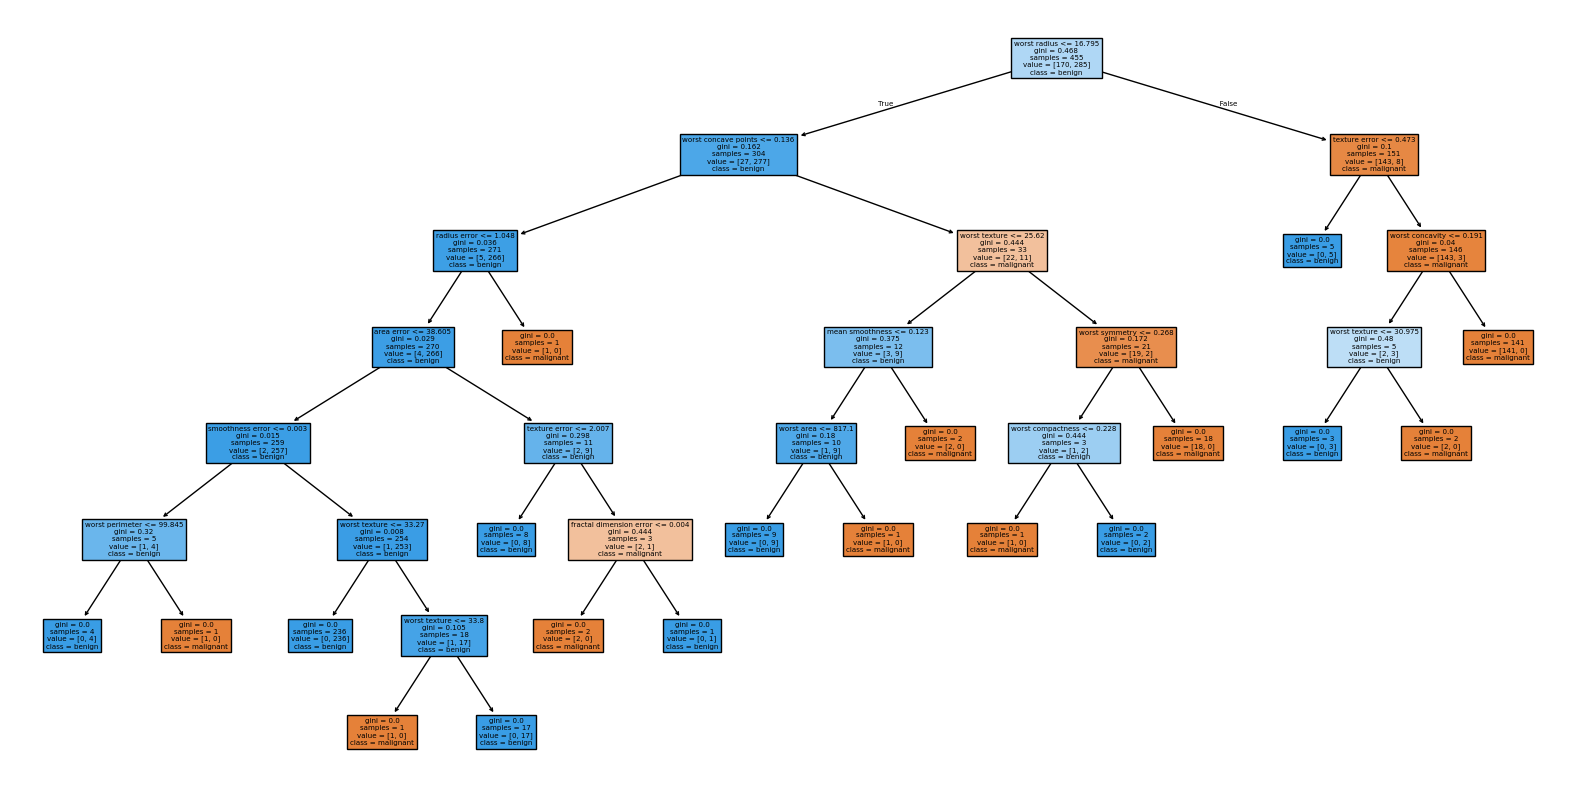

In [58]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

2.  ✏️ If there is an overfitting problem, which parameters of DecisionTreeClassifier can be predefined to perform pre-pruning (early stopping) and limit the tree's growth?

In [59]:
# Answer here
# we can predefined the parameters like maximum depth and minimun number of samples required to split a node.

### 2.2 ✏️ Hyperparameter Tuning For Decision Trees Classifier
 
1. Apply the classifier: DecisionTreeClassifier(random_state=0)
* Tune the hyperparameters:
  * max_depth: [3, 4, 5, 7, None],
  * min_samples_split: [2, 5, 10]
  
* Perform a grid search (dt_grid_search) with 5 StratifiedKFold cross-validation to find the best model parameters. 
 * scoring ='accuracy'
* Display the best hyperparameters.

In [60]:
# TODO: Implement
dt = DecisionTreeClassifier(random_state=0)
param_grid = {
    'max_depth': [3, 4, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_grid_search = GridSearchCV(dt, param_grid, cv=cv, scoring='accuracy', return_train_score=True, verbose=1)
dt_grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [61]:
# TODO: Implement
display("Best parameters:", dt_grid_search.best_params_)


'Best parameters:'

{'max_depth': 3, 'min_samples_split': 2}

2.✏️ Evaluate the best estimator on training and test data using a confusion matrix and a classification report

In [62]:
# TODO: Implement
y_pred_train_dt = dt_grid_search.predict(X_train)

print("\ntrain data Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_dt))
# Classification report
print("Classification Report for training data:\n", classification_report(y_train, y_pred_train_dt))

y_pred_test_dt = dt_grid_search.predict(X_test)

print("\ntrain data Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))
# Classification report
print("Classification Report for test data:\n", classification_report(y_test, y_pred_test_dt))


train data Confusion Matrix:
[[161   9]
 [  2 283]]
Classification Report for training data:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       170
           1       0.97      0.99      0.98       285

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455


train data Confusion Matrix:
[[38  4]
 [ 3 69]]
Classification Report for test data:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



3.✏️Visualize the decision tree.

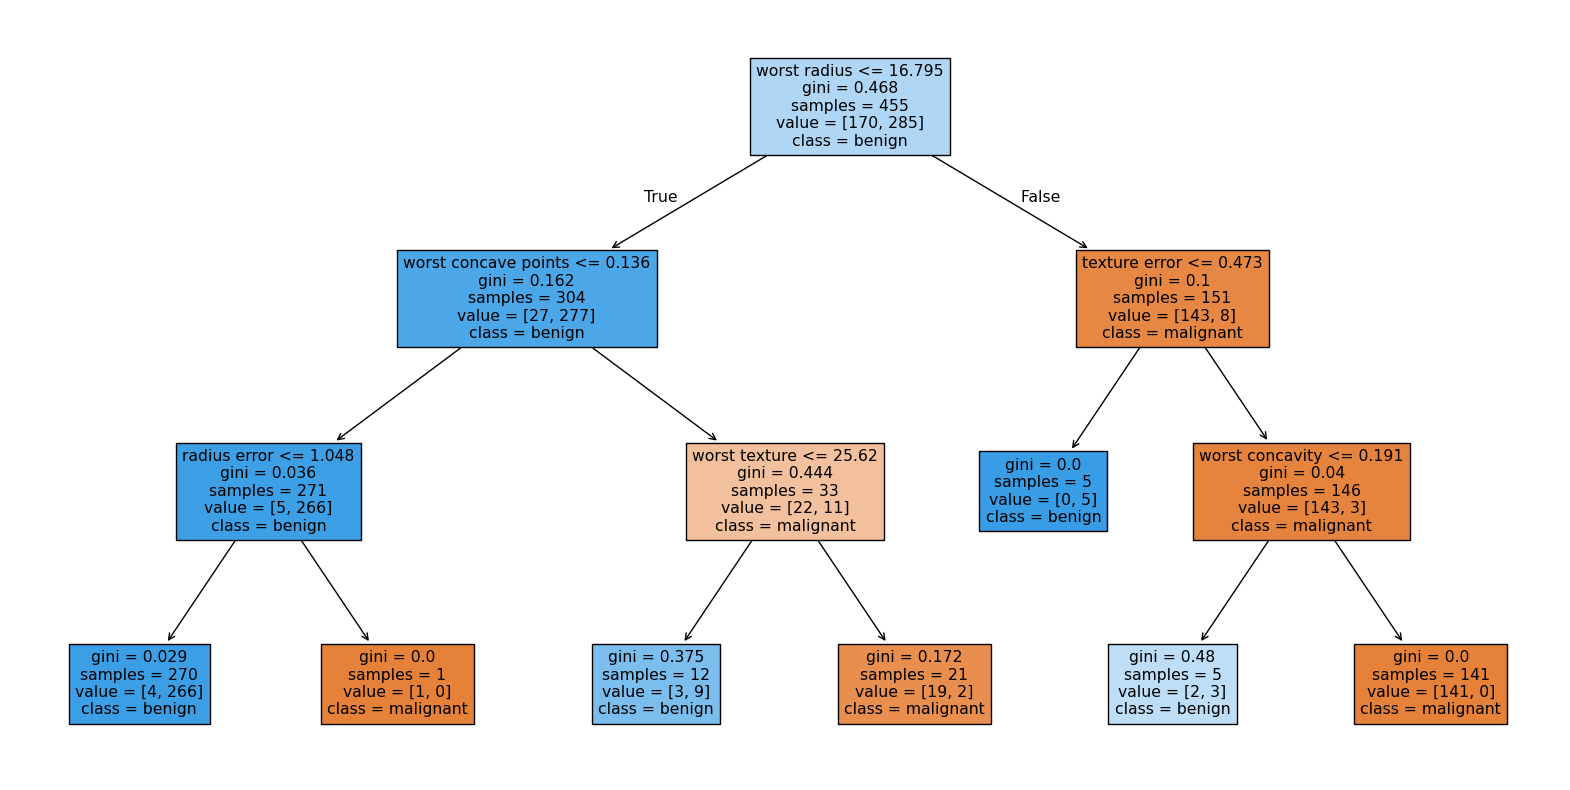

In [64]:
# TODO: Implement
plt.figure(figsize=(20, 10))
plot_tree(dt_grid_search.best_estimator_, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

4.✏️ Discuss the results.

In [54]:
#Discuss the results here
# it reduce the overfitting problem.